# DATA MINING LAB 1 

# NORMALIZATION

1. MIN MAX= Formula: (X-X{min})/(X{max}-X{min})
2. Z SCORE= Formula: (X-mean )/std 
3. DECIMAL SCALING: =X/10^{j}

In [1]:
import pandas as pd



df = pd.DataFrame({
    "Name":['vivek','bhuvan','alok','raju','yuva'],
    "Regno": [101, 102, 103, 104, 105],
    "DOB": ['2000-01-15', '1999-05-22', '2004-06-16', '2001-11-30', '2000-03-12'],
    "Mark": [85, 30, 78, None, 88],
    "Grade": ['A', 'A+', 'B', 'B+', None],
    "Gender": ['M', 'F', 'M', None, 'F']
})

df


,Name,Regno,DOB,Mark,Grade,Gender
0,vivek,101,2000-01-15,85.0,A,M
1,bhuvan,102,1999-05-22,30.0,A+,F
2,alok,103,2004-06-16,78.0,B,M
3,raju,104,2001-11-30,NaN,B+,None
4,yuva,105,2000-03-12,88.0,None,F


In [2]:
df.head()

,Name,Regno,DOB,Mark,Grade,Gender
0,vivek,101,2000-01-15,85.0,A,M
1,bhuvan,102,1999-05-22,30.0,A+,F
2,alok,103,2004-06-16,78.0,B,M
3,raju,104,2001-11-30,NaN,B+,None
4,yuva,105,2000-03-12,88.0,None,F


In [3]:
filterd=df.filter(["Name","Regno"])
filterd

,Name,Regno
0,vivek,101
1,bhuvan,102
2,alok,103
3,raju,104
4,yuva,105


In [4]:
df=df.drop_duplicates()
df

,Name,Regno,DOB,Mark,Grade,Gender
0,vivek,101,2000-01-15,85.0,A,M
1,bhuvan,102,1999-05-22,30.0,A+,F
2,alok,103,2004-06-16,78.0,B,M
3,raju,104,2001-11-30,NaN,B+,None
4,yuva,105,2000-03-12,88.0,None,F


In [5]:
missing=df.isnull().sum()
missing

Name      0
Regno     0
DOB       0
Mark      1
Grade     1
Gender    1
dtype: int64

In [6]:
df=df.dropna()
df

,Name,Regno,DOB,Mark,Grade,Gender
0,vivek,101,2000-01-15,85.0,A,M
1,bhuvan,102,1999-05-22,30.0,A+,F
2,alok,103,2004-06-16,78.0,B,M


In [7]:
df=df.rename(columns={"Regno":"Reg.No"})
df

,Name,Reg.No,DOB,Mark,Grade,Gender
0,vivek,101,2000-01-15,85.0,A,M
1,bhuvan,102,1999-05-22,30.0,A+,F
2,alok,103,2004-06-16,78.0,B,M


In [8]:
df.describe()

,Reg.No,Mark
count,3.0,3.000000
mean,102.0,64.333333
std,1.0,29.938827
min,101.0,30.000000
25%,101.5,54.000000
50%,102.0,78.000000
75%,102.5,81.500000
max,103.0,85.000000


In [9]:
min_marks=df["Mark"].min()
min_marks

30.0

In [10]:
max_marks=df["Mark"].max()
max_marks

85.0

In [11]:
mean_mark=df["Mark"].mean()
mean_mark

64.33333333333333

In [12]:
std_mark=df["Mark"].std()
std_mark

29.938826518975876

In [13]:
median_mark=df["Mark"].median()
median_mark

78.0

In [14]:
mode_mark=df["Mark"].mode()
mode_mark

0    30.0
1    78.0
2    85.0
dtype: float64

In [15]:
var_mark=df["Mark"].var()
var_mark

896.3333333333333

In [16]:
coeff=(std_mark/var_mark)*100
coeff

3.3401442750809833

In [17]:
quantile_mark=df["Mark"].quantile([.25,0.5,0.75])
quantile_mark

0.25    54.0
0.50    78.0
0.75    81.5
Name: Mark, dtype: float64

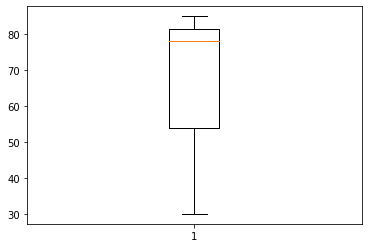

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(df["Mark"])
plt.show()

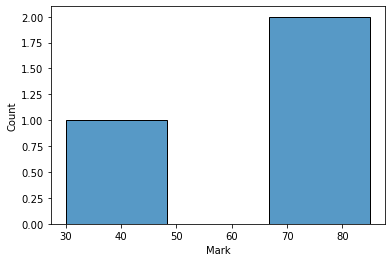

In [19]:
import seaborn as sns
sns.histplot(df["Mark"])
plt.show()

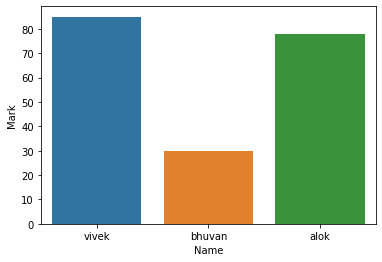

In [20]:
sns.barplot(x=df["Name"],y=df["Mark"])
plt.show()

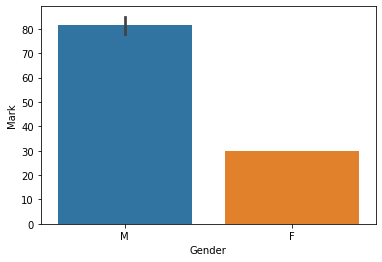

In [30]:
sns.barplot(x=df["Gender"],y=df["Mark"])
plt.show()

# MIN MAX

In [37]:
df['Mark_minmax'] = (df['Mark'] - min_marks) / (max_marks - min_marks)
df

,Name,Reg.No,DOB,Mark,Grade,Gender,Mark_minmax,Z_score,scale_results
0,vivek,101,2000-01-15,85.0,A,M,1.000000,0.690296,0.85
1,bhuvan,102,1999-05-22,30.0,A+,F,0.000000,-1.146783,0.30
2,alok,103,2004-06-16,78.0,B,M,0.872727,0.456486,0.78


# Z score

In [35]:
df['Z_score'] = (df['Mark'] - mean_mark) / std_mark
df[['Mark', 'Z_score']]

,Mark,Z_score
0,85.0,0.690296
1,30.0,-1.146783
2,78.0,0.456486


# DECIMAL SCALING

In [36]:
from decimal import Decimal
df['scale_results'] = df['Mark'] / 100.0
df[['Mark', 'scale_results']]

,Mark,scale_results
0,85.0,0.85
1,30.0,0.30
2,78.0,0.78


In [39]:
filterd=df.filter(["Name","Reg.No","Mark","Mark_minmax","Z_score","scale_results"])
filterd

,Name,Reg.No,Mark,Mark_minmax,Z_score,scale_results
0,vivek,101,85.0,1.000000,0.690296,0.85
1,bhuvan,102,30.0,0.000000,-1.146783,0.30
2,alok,103,78.0,0.872727,0.456486,0.78


# ---------------------------------------------------------------------------------------------------------